# Python for Data Analysis [Project]

### Abstract
This paper presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels. For discussion and more information of the dataset creation, please refer to the full-length article “Obesity Level Estimation Software based on Decision Trees” (De-La-Hoz-Correa et al., 2019).

Variable Information
Read the article (https://doi.org/10.1016/j.dib.2019.104344) to see the description of the attributes.

## DATA PRE-PROCESSING

In [183]:
# Import the dataframe
import pandas as pd
df = pd.read_csv("ObesityDataSet.csv")

In [184]:
# Overview of the dataset
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [185]:
# shape of the dataframe
df.shape

(2111, 17)

In [186]:
# informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [187]:
# rename the columns
df.columns=["Gender","Age","Height","Weight",'Family_Overweight',
            "High_Caloric", "Vegetables","Daily_Main_Meals",
            "Food_Between_Meals","Smoke",'Water','Monitor_Calories',
            'Physical_Activity','Screen_Time','Alcohol','Transport','Obesity']


In [188]:
# round the values and convert into the right type
df["Age"] = df["Age"].astype(int)
df["Daily_Main_Meals"]= df["Daily_Main_Meals"].round(1)
df[["Weight","Height"]] = df[["Weight","Height"]].round(2)
columns_to_round=["Vegetables", "Physical_Activity","Daily_Main_Meals","Screen_Time", "Water"]
df[columns_to_round]= df[columns_to_round].round(0).astype(int)


In [189]:
# compute Mass Body Index
df["MBI"] = (df["Weight"]/(df["Height"]**2)).round(2)

In [190]:
# map the answers

from mapping import *
df["Screen_Time"] = df["Screen_Time"].map(Screen_Time)
df["Transport"]= df["Transport"].map(MTRANS)
df["Vegetables"] = df["Vegetables"].map(Vegetables)
df["Daily_Main_Meals"] = df["Daily_Main_Meals"].map(DailyMainMeals)
df["Water"] = df["Water"].map(Water)
df["Physical_Activity"] = df["Physical_Activity"].map(Physical_Activity)

In [191]:
# final dataset
df.head(5)

,Gender,Age,Height,Weight,Family_Overweight,High_Caloric,Vegetables,Daily_Main_Meals,Food_Between_Meals,Smoke,Water,Monitor_Calories,Physical_Activity,Screen_Time,Alcohol,Transport,Obesity,MBI
0,Female,21,1.62,64.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2L,no,No,3–5 hours,no,Public,Normal_Weight,24.39
1,Female,21,1.52,56.0,yes,no,Always,More than three,Sometimes,yes,More than 2L,yes,4 or 5 days,0–2 hours,Sometimes,Public,Normal_Weight,24.24
2,Male,23,1.80,77.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2L,no,2 or 4 days,3–5 hours,Frequently,Public,Normal_Weight,23.77
3,Male,27,1.80,87.0,no,no,Always,More than three,Sometimes,no,Between 1 and 2L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight_Level_I,26.85
4,Male,22,1.78,89.8,no,no,Sometimes,Between 1 and 2,Sometimes,no,Between 1 and 2L,no,No,0–2 hours,Sometimes,Public,Overweight_Level_II,28.34


In [192]:
df.describe()

,Age,Height,Weight,MBI
count,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701620,86.586035,29.703240
std,6.308664,0.093368,26.191163,8.015958
min,14.000000,1.450000,39.000000,13.000000
25%,19.000000,1.630000,65.470000,24.325000
50%,22.000000,1.700000,83.000000,28.730000
75%,26.000000,1.770000,107.430000,35.955000
max,61.000000,1.980000,173.000000,50.820000


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              2111 non-null   object 
 1   Age                 2111 non-null   int64  
 2   Height              2111 non-null   float64
 3   Weight              2111 non-null   float64
 4   Family_Overweight   2111 non-null   object 
 5   High_Caloric        2111 non-null   object 
 6   Vegetables          2111 non-null   object 
 7   Daily_Main_Meals    1956 non-null   object 
 8   Food_Between_Meals  2111 non-null   object 
 9   Smoke               2111 non-null   object 
 10  Water               2111 non-null   object 
 11  Monitor_Calories    2111 non-null   object 
 12  Physical_Activity   2111 non-null   object 
 13  Screen_Time         2111 non-null   object 
 14  Alcohol             2111 non-null   object 
 15  Transport           2111 non-null   object 
 16  Obesit

## Data visualization

In [194]:
import matplotlib.pyplot as plt
desired_weight_order = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

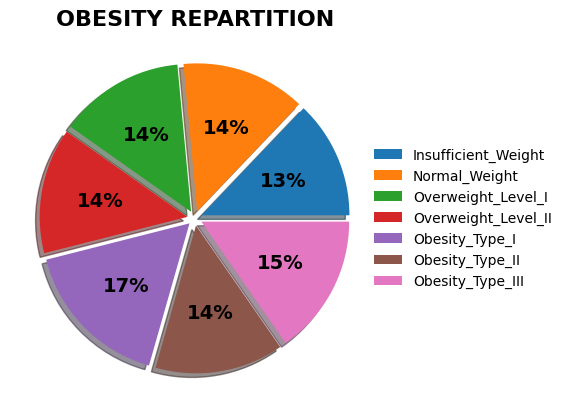

In [195]:
plt.style.use("default")
array = df["Obesity"].value_counts()[desired_weight_order]
ax = array.plot(kind = "pie",  startangle = 0,
               shadow = True,legend=True, ylabel="",textprops={'weight': 'bold', 'size': 14},
               autopct = '%1.0f%%',pctdistance=.6, labeldistance=None, explode = [0.05 for _ in range(len(array))])

ax.legend(bbox_to_anchor=(1.5, 0.5), loc='right',frameon = False)

plt.title("OBESITY REPARTITION",fontsize=16, fontweight='bold')
plt.show()

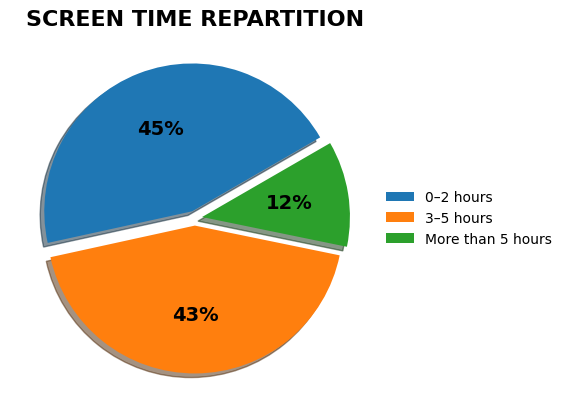

In [196]:
plt.style.use("default")
array = df["Screen_Time"].value_counts()
ax = array.plot(kind = "pie",  startangle = 30,
               shadow = True,legend=True, ylabel="",textprops={'weight': 'bold', 'size': 14},
               autopct = '%1.0f%%',pctdistance=.6, labeldistance=None, explode = [0.05 for _ in range(len(array))])
ax.legend(bbox_to_anchor=(1.5, 0.5), loc='right',frameon = False)
plt.title("SCREEN TIME REPARTITION",fontsize=16, fontweight='bold')
plt.show()

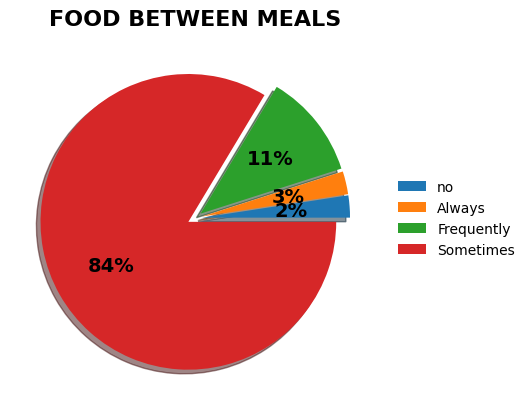

In [197]:
ax = df["Food_Between_Meals"].value_counts().sort_values().plot(kind = "pie",  startangle = 0,y="Emissions",
               shadow = True,legend=True, ylabel="",explode = [0.05 for _ in range(4)],textprops={'weight': 'bold', 'size': 14},
               autopct = '%1.0f%%',pctdistance=.6, labeldistance=None)
ax.legend(bbox_to_anchor=(1.4, 0.5), loc='right',frameon = False)
plt.title("FOOD BETWEEN MEALS",fontsize=16, fontweight='bold')
plt.show()

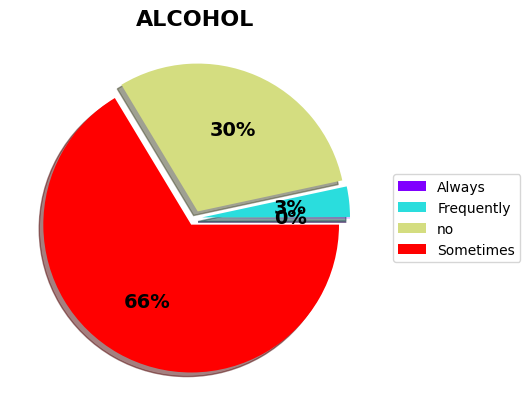

In [198]:
ax = df["Alcohol"].value_counts().sort_values().plot(kind = "pie",  startangle = 0,y="Alcohol",
               shadow = True,legend=True, ylabel="",explode = [0.05 for _ in range(4)],textprops={'weight': 'bold', 'size': 14},
               autopct = '%1.0f%%',pctdistance=.6, labeldistance=None, colormap="rainbow")
ax.legend(bbox_to_anchor=(1.4, 0.5), loc='right')
plt.title("ALCOHOL",fontsize=16, fontweight='bold')
plt.show()

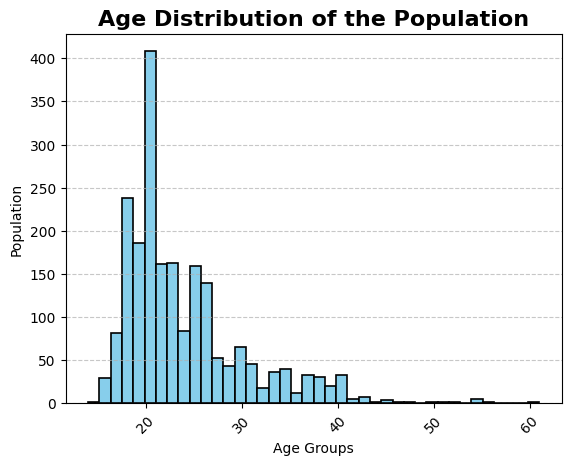

In [199]:
df["Age"].plot(kind="hist", bins=40, color='skyblue', edgecolor='black', linewidth=1.2)

plt.title("Age Distribution of the Population", fontsize=16, fontweight='bold')
plt.xlabel("Age Groups")
plt.ylabel("Population")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [200]:
import seaborn as sns

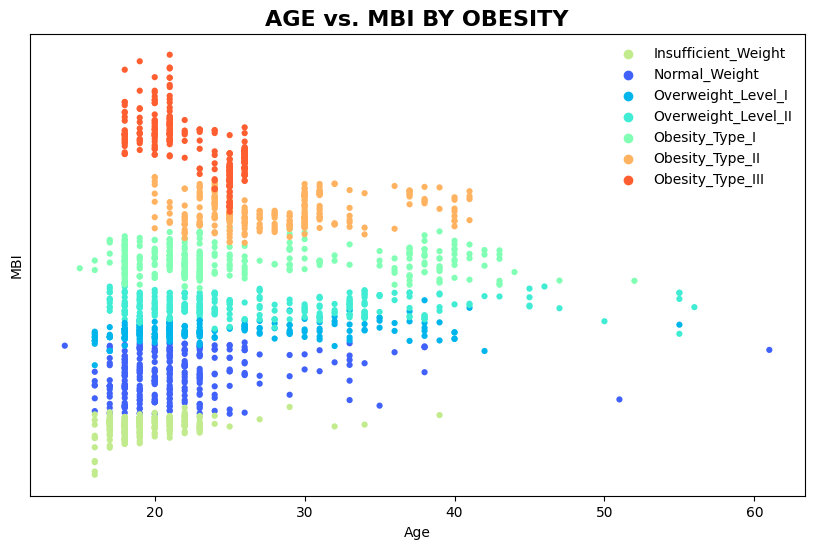

In [201]:
desired_legend_order=[ 'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

# Create a custom color palette for the obesity levels
custom_palette = sns.color_palette("rainbow", n_colors=len(desired_legend_order))

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="Age", y="MBI", hue="Obesity", palette=custom_palette, marker="o", s=20, linewidth=0)

# Get the current legend
legend = plt.legend(loc='upper right', title="Obesity", title_fontsize=12)

# Create a custom legend in the desired order
handles, labels = [], []
for level in desired_legend_order:
    index = df["Obesity"].unique().tolist().index(level)
    handles.append(legend.legendHandles[index])
    labels.append(level)

legend.remove()  # Remove the default legend
plt.legend(handles, labels, title_fontsize=12, loc='upper right', frameon = False)
plt.tick_params(left=False, right=False, labelleft=False)
plt.title("AGE vs. MBI BY OBESITY", fontsize=16, fontweight='bold')

plt.show()

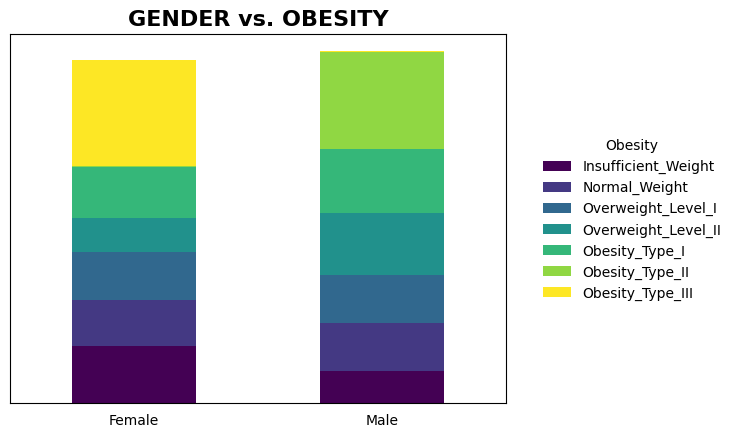

In [202]:
crosstab = pd.crosstab(df['Gender'], df['Obesity'])

# Create the axes and set its background color
ax = plt.gca()
crosstab = crosstab[desired_weight_order]
crosstab.plot(kind='bar',stacked=True,colormap='viridis',ax=ax)
plt.title("GENDER vs. OBESITY",fontsize=16, fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=0)

plt.legend(title='Obesity', bbox_to_anchor=(1.05, .75), loc='upper left', frameon = False)
plt.tick_params(left = False, right = False , labelleft = False, bottom = False)
plt.show()

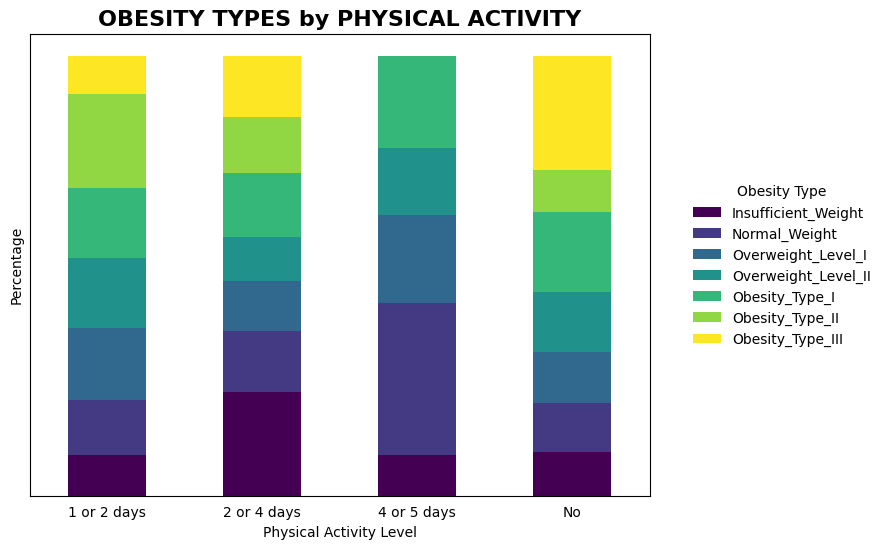

In [203]:
df_counts = df.groupby(['Physical_Activity', 'Obesity']).size().unstack()

df_percentage = df_counts.div(df_counts.sum(axis=1), axis=0) * 100
df_percentage = df_percentage[desired_weight_order]

# Create the axes and set its background color
ax = plt.gca()

# Plot the data
df_percentage.plot(kind='bar', stacked=True, cmap='viridis', figsize=(8, 6), ax=ax)

# Set plot details
plt.title("OBESITY TYPES by PHYSICAL ACTIVITY", fontsize=16, fontweight='bold')
plt.xlabel("Physical Activity Level")
plt.ylabel("Percentage")
plt.tick_params(left=False, bottom=False, labelleft=False)
plt.xticks(rotation=0)
plt.legend(title="Obesity Type", bbox_to_anchor=(1.05, 0.7), frameon=False)

plt.show()

In [204]:
crosstab = pd.crosstab(df['Obesity'], df['Vegetables'], normalize='index') * 100
crosstab = crosstab.reindex(desired_weight_order)
crosstab= crosstab[["Always","Sometimes","Never"]]

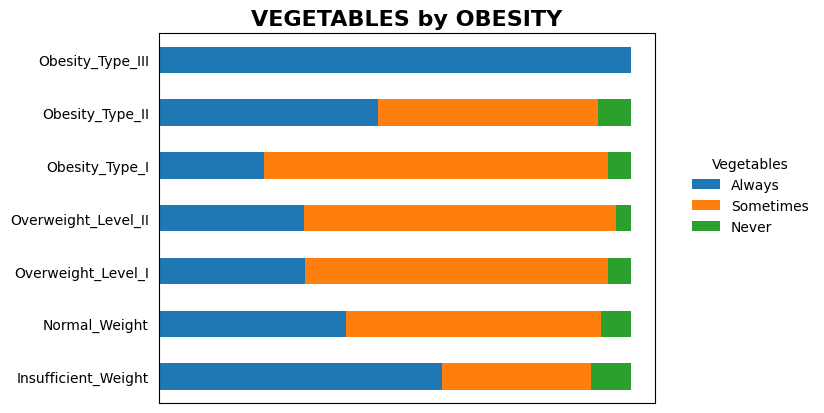

In [205]:
fig, ax = plt.subplots()

# Plot your data on the axes and set the axes background color
crosstab.plot(kind='barh', stacked=True, ax=ax)
plt.title('VEGETABLES by OBESITY', fontsize=16, fontweight='bold')
plt.ylabel("")
plt.legend(title="Vegetables", bbox_to_anchor=(1.05, .7), loc='upper left', frameon=False)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.show()

## MODELLING

In [206]:
# Convert from categorical to numeric data
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = df.select_dtypes(include=["object"]).apply(lambda col : le.fit_transform(col))

# printing label
df =  pd.concat([label.reset_index(drop=True), df.select_dtypes(exclude=["object"])], axis=1) 
df

,Gender,Family_Overweight,High_Caloric,Vegetables,Daily_Main_Meals,Food_Between_Meals,Smoke,Water,Monitor_Calories,Physical_Activity,Screen_Time,Alcohol,Transport,Obesity,Age,Height,Weight,MBI
0,0,1,0,2,1,2,0,0,0,3,1,3,3,1,21,1.62,64.00,24.39
1,0,1,0,0,1,2,1,2,1,2,0,2,3,1,21,1.52,56.00,24.24
2,1,1,0,2,1,2,0,0,0,1,1,1,3,1,23,1.80,77.00,23.77
3,1,0,0,0,1,2,0,0,0,1,0,1,4,5,27,1.80,87.00,26.85
4,1,0,0,2,0,2,0,0,0,3,0,2,3,6,22,1.78,89.80,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,1,0,1,2,0,0,0,1,1,2,3,4,20,1.71,131.41,44.94
2107,0,1,1,0,1,2,0,0,0,0,1,2,3,4,21,1.75,133.74,43.67
2108,0,1,1,0,1,2,0,0,0,0,1,2,3,4,22,1.75,133.69,43.65
2109,0,1,1,0,1,2,0,2,0,0,1,2,3,4,24,1.74,133.35,44.04


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Obesity","MBI"], axis=1), df[["Obesity"]], test_size=0.33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Standardize the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data


(1414, 16)
(697, 16)
(1414, 1)
(697, 1)


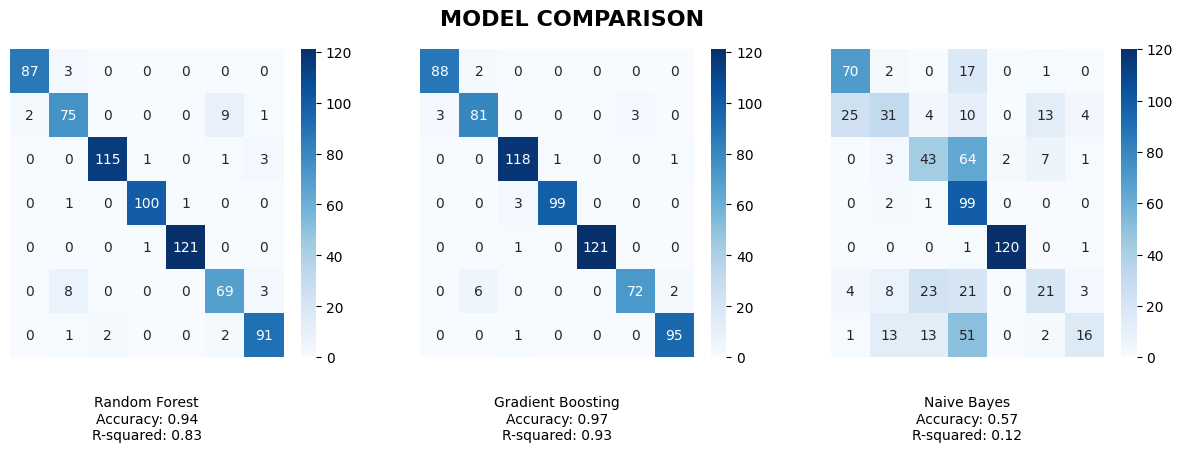

In [208]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
# Modeling
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes" : GaussianNB(),
}

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]},
    "Naive Bayes" : {},
}

best_models = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train.to_numpy().ravel())
    best_models[model_name] = grid_search.best_estimator_

# Evaluate and compare models
results = {}

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[model_name] = {"Accuracy": accuracy, "Confusion Matrix": confusion_mat, "R2" : r2}

# Visualize results
fig, axes = plt.subplots(nrows=1, ncols=len(results), figsize=(15, 4))
fig.suptitle("MODEL COMPARISON",fontsize=16, fontweight='bold')

for i, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_xticks([])  # Remove x-axis ticks
    axes[i].set_yticks([])  # Remove y-axis ticks
    axes[i].text(0.5, -0.2, f"{model_name}\nAccuracy: {result['Accuracy']:.2f}\nR-squared: {result['R2']:.2f}", ha='center', va='center', transform=axes[i].transAxes, fontsize=10)
    

plt.show()